some coding to get jupyter set up

In [1]:
import qiskit
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

import numpy as np
import matplotlib.pyplot as plt

q = QuantumRegister(1)
from math import pi

from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

# How can one emulate a rotation of the measurement basis?

1. Create circuit
2. Pick backend
3. Execute your circuit on your backend
4. Access the result from the job object

Rotation around x axis:

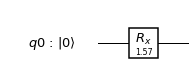

In [2]:
qc = QuantumCircuit(q)
qc.rx(pi/2,q)
qc.draw(output='mpl')

In [3]:
job = execute(qc, backend)

In [4]:
job.result().get_unitary(qc, decimals=3)

array([[0.707+0.j   , 0.   -0.707j],
       [0.   -0.707j, 0.707+0.j   ]])

Rotation around y axis:

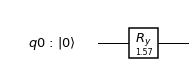

In [5]:
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
qc.draw(output='mpl')

In [6]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

Rotation around z axis:

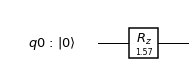

In [7]:
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
qc.draw(output='mpl')

In [8]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

# What measurements do you need to perform to fully characterize the state prepared by a circuit?

to set up circuit:

In [9]:
q = QuantumRegister (1)
c = ClassicalRegister (1)

circuit = QuantumCircuit(q,c)

add in a gate: 

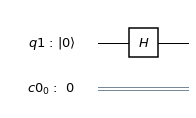

In [10]:
circuit.h(q)
circuit.draw(output='mpl')

add in circuit measurement:

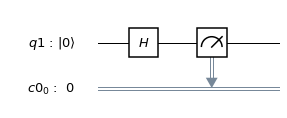

In [11]:
circuit.measure(q,c)
circuit.draw(output='mpl')

Determine counts for circuit:

In [12]:
job = execute(circuit, simulator, shots=100)
result = job.result()

In [13]:
counts = result.get_counts(circuit)
print("\nTotal count for 0 and 1 are:",counts)


Total count for 0 and 1 are: {'1': 52, '0': 48}


put in a histogram

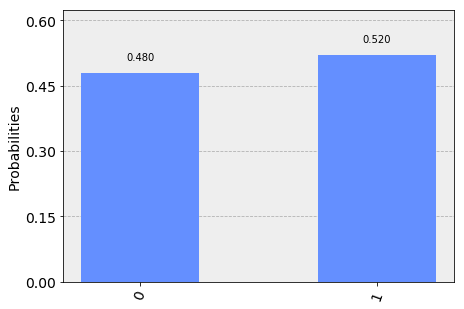

In [14]:
plot_histogram(counts)

# Can one figure out a way to understand what a given gate does simply based on measurement results? How many measurements would one need to perform?

If we know what state the qubit is in after going through gate we can figure out what state it is before it went into the gate

Say we have these measurements:

We know this would be a Pauli-X gate, as |0> would go to |1> and |1> would go to |0>

We can also run a double gate if necessary. When a qubit goes through an H gate, it is in superposition. However, when it goes through two H gates, the qubit is back to its original state. This is because the H gate is revesible.

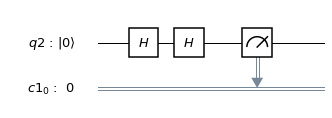

In [15]:
q = QuantumRegister (1)
c = ClassicalRegister (1)
circuit = QuantumCircuit(q,c)
circuit.h(q)
qc.barrier()
circuit.h(q)
circuit.measure(q,c)
circuit.draw(output='mpl')

In [16]:
job = execute(circuit, simulator, shots=100)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 0 and 1 are:",counts)


Total count for 0 and 1 are: {'0': 100}


However, if the qubit starts at the Y axis, is rotated 90 degrees, then goes back to the Y axis, it is unknown whether or not the qubit is in state 0 or state 1

# Use the Bloch sphere representation to confirm your method to determine the state prepared by a circuit through measurements.

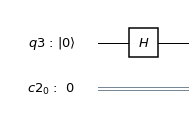

In [17]:
q = QuantumRegister (1)
c = ClassicalRegister (1)
bell = QuantumCircuit(q,c)
bell.h(q)
qc.barrier()
#bell.measure(q,c)
bell.draw(output='mpl')

In [18]:
job = execute(bell, simulator, shots=1000)
result = job.result()
counts = result.get_counts(bell)
print("\nTotal count for 0 and 1 are:",counts)

No measurements in circuit "circuit10": count data will return all zeros.



Total count for 0 and 1 are: {'0': 1000}


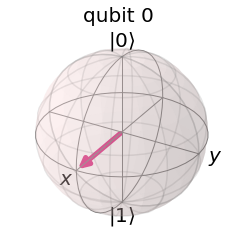

In [19]:
# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)
plot_bloch_multivector(psi)

The Bloch Sphere shows a superposition on the x axis. This reveals that H gates put a qubit in superposition

# Confirm the action of a gate on a qubit using the Bloch sphere representation. Confront your result to the answer you had formulated using measurement outcomes.

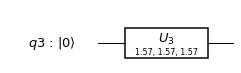

In [20]:
bell = QuantumCircuit(q)
bell.u3(pi/2,pi/2,pi/2,q)
bell.draw(output='mpl')

In [21]:
backend = BasicAer.get_backend('unitary_simulator')
job = execute(bell, backend)
job.result().get_unitary(bell)

array([[ 0.70710678+0.j        ,  0.        -0.70710678j],
       [ 0.        +0.70710678j, -0.70710678+0.j        ]])

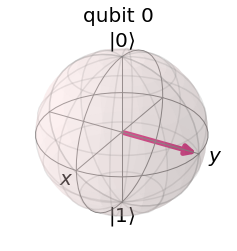

In [22]:
# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)
plot_bloch_multivector(psi)

In [23]:
q = QuantumRegister (1)
c = ClassicalRegister (1)
bell = QuantumCircuit(q,c)
bell.u3(pi/2,pi/2,pi/2,q)
bell.measure(q,c)
job = execute(bell, simulator, shots=1000)
result = job.result()
counts = result.get_counts(bell)
print("\nTotal count for 0 and 1 are:",counts)


Total count for 0 and 1 are: {'1': 489, '0': 511}


We are now in superposition. We see that the qubit is on the Y axis. We can try measure the Y gate

In [24]:
q = QuantumRegister (1)
c = ClassicalRegister (1)
bell = QuantumCircuit(q,c)
bell.y(q)
bell.measure(q,c)
job = execute(bell, simulator, shots=1000)
result = job.result()
counts = result.get_counts(bell)
print("\nTotal count for 0 and 1 are:",counts)


Total count for 0 and 1 are: {'1': 1000}


When we apply the Y gate, the count for 1 is '1': 1000. This is not a large enough number to say that we are sure that the qubit is in the 1 vector. Also, we cannot measure the axis after a rotation because this measurement interferes with the qubit.

# Figure out the link between the state of your qubit and the output of plot-city_state. What is the meaning of the non-diagonal elements ?

In [25]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector

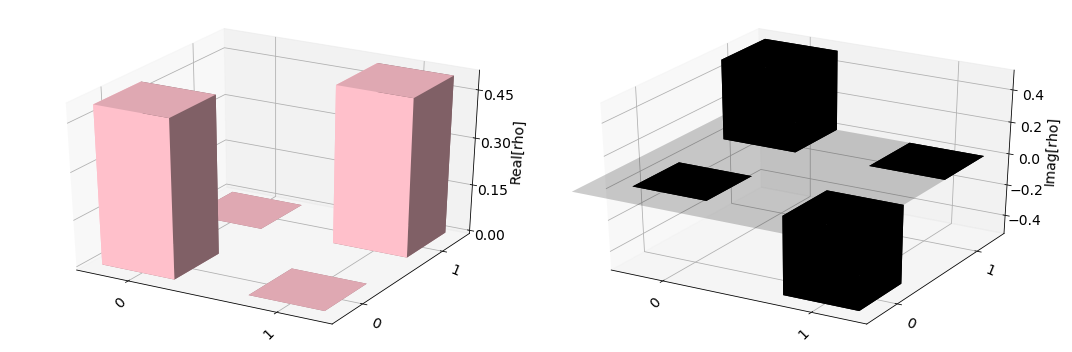

In [26]:
bell = QuantumCircuit(q)
bell.u3(pi/2,pi/2,pi/2,q)
bell.draw(output='mpl')
# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)
plot_state_city(psi, color = [['pink'] , 'black'])

These graphs are the plots of the real and imaginary numbers in the matrix. The values are different between the two graphs because we do not know what state the qubit is in. It is in superposition. Here, we see that when rotated 90 degrees we have a 50:50 shot of being in either 0 or 1. 